In [1]:
import pandas as pd
import numpy as np
import nltk
import os
import nltk.corpus
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns

D:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_excel("Data Wrangling.xlsx")
data = df[['AB']]
data = data.fillna('-')

In [3]:
import re
data['processed_AB'] = data['AB'].map(lambda x: re.sub('[,\.!?]', '', x))
data['processed_AB'] = data['processed_AB'].map(lambda x: x.lower())

In [4]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
cleaned_list = []

for X in data['processed_AB']:
    
    token = word_tokenize(X)

    lemmatized = []
    for i in token:
        lemmatized.append(lemmatizer.lemmatize(i))

    lemmatized = list(set(lemmatized))

    clean_words = [x for x in lemmatized if x not in stopwords]
    cleaned_list.append(" ".join(clean_words))


In [5]:
data['cleaned_AB'] = cleaned_list

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')

from sklearn.decomposition import LatentDirichletAllocation
LDA = LatentDirichletAllocation(n_components=5,random_state=42)

data_new = data['cleaned_AB']
data = data.fillna('-')

dtm = cv.fit_transform(data_new)
LDA.fit(dtm)

for index,topic in enumerate(LDA.components_):
    print(f'THE TOP 10 WORDS FOR TOPIC #{index}')
    print([cv.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

topic_results = LDA.transform(dtm)
argmax_list = topic_results.argmax(axis=1)
data["Category_AB"] = argmax_list

THE TOP 10 WORDS FOR TOPIC #0
['francis', 'taylor', 'ha', 'group', 'paper', 'industry', 'technology', 'study', 'literature', 'research']


THE TOP 10 WORDS FOR TOPIC #1
['2019', 'decision', 'elsevier', 'model', 'algorithm', 'ha', 'different', 'paper', 'based', 'result']


THE TOP 10 WORDS FOR TOPIC #2
['study', 'francis', 'taylor', 'manufacturing', '2019', 'paper', 'industry', 'research', 'data', 'technology']


THE TOP 10 WORDS FOR TOPIC #3
['data', 'performance', 'network', 'elsevier', 'time', 'result', 'model', 'based', 'paper', 'proposed']


THE TOP 10 WORDS FOR TOPIC #4
['ha', 'business', 'study', 'information', 'paper', 'thing', 'iot', 'data', 'internet', 'based']




In [7]:
data_ID = df['ID']
data_AU = df['AU']
data_DE = df['DE']

data_ID =data_ID.fillna('-')
data_AU =data_AU.fillna('-')
data_DE =data_DE.fillna('-')

In [8]:
def split(X):
    split_list=[]
    for i in X:
        split = i.split(';')
        split_list.append(split)
    return split_list

In [9]:
data['ID'] = split(data_ID)
data['AU'] = split(data_AU)
data['DE'] = split(data_DE)

In [10]:
data['SO'] = df['SO']
data['Year'] = df['PY']

In [11]:
data

,AB,processed_AB,cleaned_AB,Category_AB,ID,AU,DE,SO,Year
0,"THE EXPLOSION OF REUSABLE WEB SERVICES (E.G., ...",the explosion of reusable web services (eg ope...,open degree source conducting effort precision...,3,"[APPLICATION PROGRAMMING INTERFACES (API), CO...","[BOTANGEN KA, YU J, SHENG QZ, HAN Y, YONGCHARE...","[IMPLICIT FEEDBACK, LOCATION, MATRIX FACTORI...",EXPERT SYSTEMS WITH APPLICATIONS,2020
1,THE INTERNET OF THINGS (IOT) IS GROWING GLOBAL...,the internet of things (iot) is growing global...,algorithm ability healthcare malware satisfact...,4,"[AUTOMATIC PROGRAMMING, BEHAVIORAL RESEARCH, ...","[ROLDN J, BOUBETA-PUIG J, LUIS MARTNEZ J, ORTI...","[COMPLEX EVENT PROCESSING, INTELLIGENT DECISI...",EXPERT SYSTEMS WITH APPLICATIONS,2020
2,WITH THE DEVELOPMENT OF LOCATION-AWARE TECHNOL...,with the development of location-aware technol...,algorithm open mining trajectory clustering en...,3,"[CLUSTER ANALYSIS, CLUSTERING ALGORITHMS, DA...","[ZHAO X, PI D, CHEN J]","[CLUSTER ANALYSIS, DIFFERENTIAL PRIVACY, PRI...",EXPERT SYSTEMS WITH APPLICATIONS,2020
3,ALTHOUGH GOVERNMENT APPLICATIONS (APPS) HAVE D...,although government applications (apps) have d...,chengdu degree conducting consequence level tr...,0,"[HUMAN COMPUTER INTERACTION, CHENGDU, CITIZE...","[WANG G, CHEN Q, XU Z, LENG X]","[CITIZEN COMPLIANCE, GOVERNMENT APP, GOVERNM...",COMPUTERS IN HUMAN BEHAVIOR,2020
4,FEATURE SELECTION PLAYS A VITAL ROLE IN BUILDI...,feature selection plays a vital role in buildi...,algorithm nls-kdd way vital faster outperforme...,3,"[COMPUTER CRIME, INTRUSION DETECTION, NETWOR...","[ALAZZAM H, SHARIEH A, SABRI KE]","[FEATURE SELECTION, INTRUSION DETECTION SYSTE...",EXPERT SYSTEMS WITH APPLICATIONS,2020
...,...,...,...,...,...,...,...,...,...
514,RFID HAS EMERGED AS A POTENTIAL TOOL TO COMBAT...,rfid has emerged as a potential tool to combat...,drop ensure production vital purpose tagging g...,4,"[ANTI-COUNTERFEITING, MOVING SPEED, PRODUCT ...","[CHEUNG HH, CHOI SH]","[ANTI-COUNTERFEITING, CRITICAL TAG MOVING SPE...",COMPUTERS IN INDUSTRY,2011
515,MODERN INFORMATION RETRIEVAL (IR) SYSTEMS CONS...,modern information retrieval (ir) systems cons...,collection clustering biological nowadays text...,3,"[EXTRACTIVE SUMMARIZATIONS, FUZZY EVOLUTIONAR...","[SONG W, CHEON CHOI L, CHEOL PARK S, FENG DING X]","[EXTRACTIVE SUMMARIZATION, FUZZY EVOLUTIONARY...",EXPERT SYSTEMS WITH APPLICATIONS,2011
516,ADVANCES IN PRODUCTION PLANNING AND CONTROL IN...,advances in production planning and control in...,decade focused function feasible production so...,3,"[DECENTRALISED, DISTURBANCES, INTELLIGENT PR...","[MEYER GG, HANS WORTMANN JC, SZIRBIK NB]","[DISTURBANCES, INTELLIGENT PRODUCTS, MONITOR...",INTERNATIONAL JOURNAL OF PRODUCTION RESEARCH,2011
517,AS QUALITY REQUIREMENTS PLAY A CRUCIAL ROLE IN...,as quality requirements play a crucial role in...,analyse breakthrough quality objective year se...,4,"[ENTERPRISE INFORMATION SYSTEM, INTERNET OF T...",[XU LD],"[AGENT, ENTERPRISE INFORMATION SYSTEMS, INTE...",INTERNATIONAL JOURNAL OF PRODUCTION RESEARCH,2011


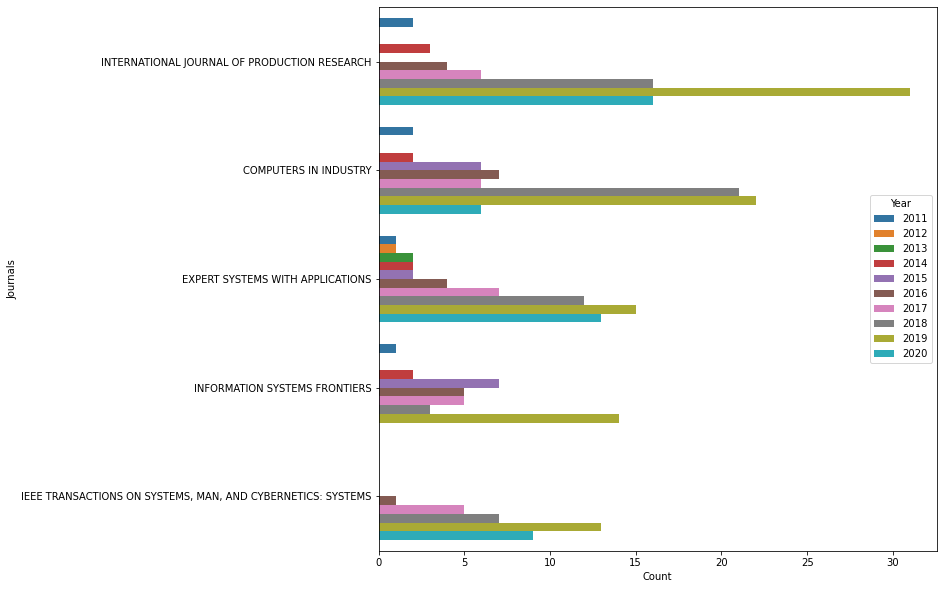

In [12]:
plt.rcParams["figure.figsize"] = (10,10)
sns.countplot(data = data, y= 'SO',order=data['SO'].value_counts().iloc[:5].index,hue='Year')
plt.xlabel('Count')
plt.ylabel('Journals')
plt.show()

In [13]:
list_DE = []
for i in data['DE']:
    list_DE.extend(i)
    list_DE = [x.strip(' ') for x in list_DE]

In [14]:
df_DE = pd.DataFrame(list_DE)

In [15]:
df_DE[0].value_counts().iloc[:10]

INTERNET OF THINGS          92
INDUSTRY 4.0                55
INTERNET OF THINGS (IOT)    37
BIG DATA                    32
IOT                         21
BLOCKCHAIN                  19
CYBER-PHYSICAL SYSTEMS      18
SUPPLY CHAIN MANAGEMENT     17
RFID                        16
SMART MANUFACTURING         16
Name: 0, dtype: int64

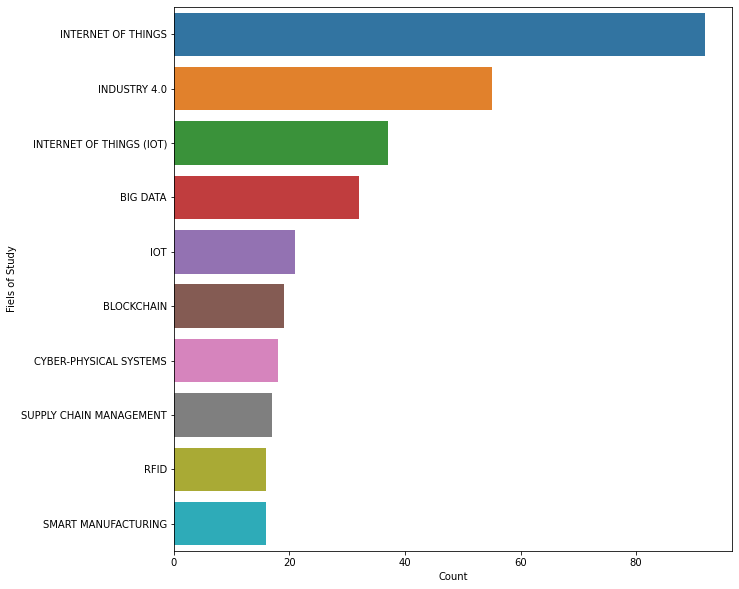

In [16]:
plt.rcParams["figure.figsize"] = (10,10)
sns.countplot(data = df_DE, y= 0,order=df_DE[0].value_counts().iloc[:10].index)
plt.xlabel('Count')
plt.ylabel('Fiels of Study')
plt.show()

In [17]:
list_AU = []
for i in data['AU']:
    list_AU.extend(i)
    list_AU = [x.strip(' ') for x in list_AU]

In [18]:
df_AU = pd.DataFrame(list_AU)

In [19]:
df_AU[0].value_counts().iloc[:10]

LU R             14
WU ZG            11
ZHANG Y          11
GUNASEKARAN A    10
SU H              9
XU X              9
SHI P             7
XU Y              7
HUANG GQ          7
LI Z              7
Name: 0, dtype: int64

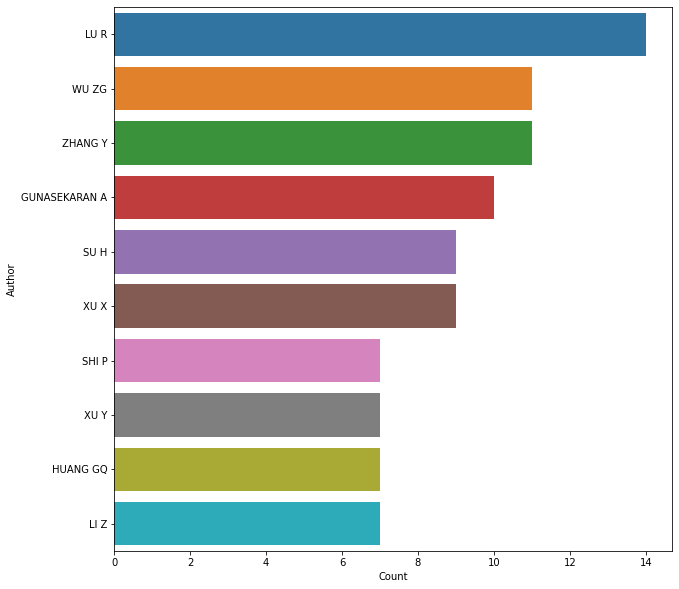

In [20]:
plt.rcParams["figure.figsize"] = (10,10)
sns.countplot(data = df_AU, y= 0,order=df_AU[0].value_counts().iloc[:10].index)
plt.xlabel('Count')
plt.ylabel('Author')
plt.show()

In [21]:
year_data = data.groupby('Year').count().iloc[:,1]

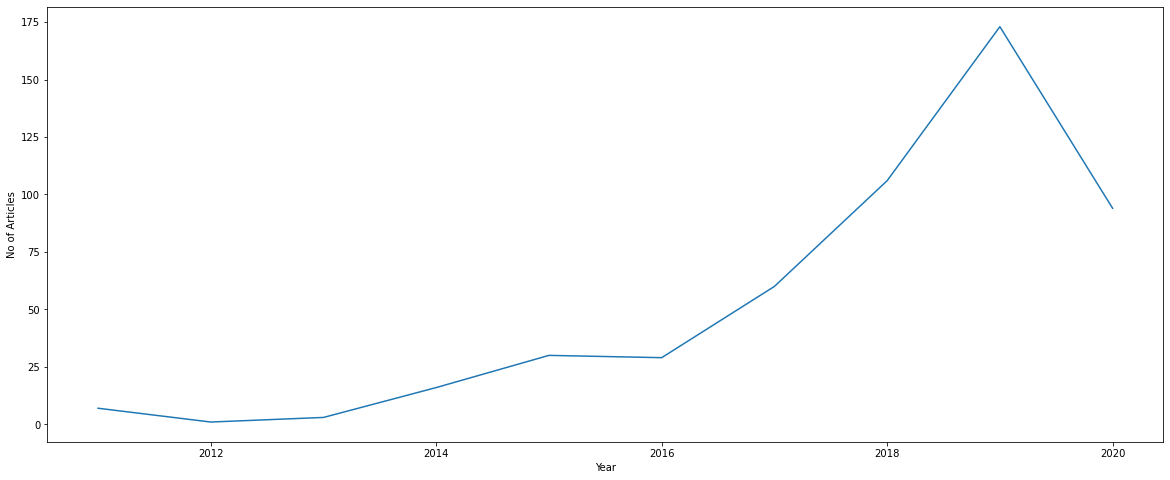

In [22]:
plt.rcParams["figure.figsize"] = (20,8)
plt.plot(year_data)
plt.xlabel('Year')
plt.ylabel('No of Articles')
plt.show()

In [23]:
so_data = data.groupby(['Year']).count().iloc[:,1]

In [24]:
so_data.sort_values(ascending=False)

Year
2019    173
2018    106
2020     94
2017     60
2015     30
2016     29
2014     16
2011      7
2013      3
2012      1
Name: processed_AB, dtype: int64

In [25]:
data

,AB,processed_AB,cleaned_AB,Category_AB,ID,AU,DE,SO,Year
0,"THE EXPLOSION OF REUSABLE WEB SERVICES (E.G., ...",the explosion of reusable web services (eg ope...,open degree source conducting effort precision...,3,"[APPLICATION PROGRAMMING INTERFACES (API), CO...","[BOTANGEN KA, YU J, SHENG QZ, HAN Y, YONGCHARE...","[IMPLICIT FEEDBACK, LOCATION, MATRIX FACTORI...",EXPERT SYSTEMS WITH APPLICATIONS,2020
1,THE INTERNET OF THINGS (IOT) IS GROWING GLOBAL...,the internet of things (iot) is growing global...,algorithm ability healthcare malware satisfact...,4,"[AUTOMATIC PROGRAMMING, BEHAVIORAL RESEARCH, ...","[ROLDN J, BOUBETA-PUIG J, LUIS MARTNEZ J, ORTI...","[COMPLEX EVENT PROCESSING, INTELLIGENT DECISI...",EXPERT SYSTEMS WITH APPLICATIONS,2020
2,WITH THE DEVELOPMENT OF LOCATION-AWARE TECHNOL...,with the development of location-aware technol...,algorithm open mining trajectory clustering en...,3,"[CLUSTER ANALYSIS, CLUSTERING ALGORITHMS, DA...","[ZHAO X, PI D, CHEN J]","[CLUSTER ANALYSIS, DIFFERENTIAL PRIVACY, PRI...",EXPERT SYSTEMS WITH APPLICATIONS,2020
3,ALTHOUGH GOVERNMENT APPLICATIONS (APPS) HAVE D...,although government applications (apps) have d...,chengdu degree conducting consequence level tr...,0,"[HUMAN COMPUTER INTERACTION, CHENGDU, CITIZE...","[WANG G, CHEN Q, XU Z, LENG X]","[CITIZEN COMPLIANCE, GOVERNMENT APP, GOVERNM...",COMPUTERS IN HUMAN BEHAVIOR,2020
4,FEATURE SELECTION PLAYS A VITAL ROLE IN BUILDI...,feature selection plays a vital role in buildi...,algorithm nls-kdd way vital faster outperforme...,3,"[COMPUTER CRIME, INTRUSION DETECTION, NETWOR...","[ALAZZAM H, SHARIEH A, SABRI KE]","[FEATURE SELECTION, INTRUSION DETECTION SYSTE...",EXPERT SYSTEMS WITH APPLICATIONS,2020
...,...,...,...,...,...,...,...,...,...
514,RFID HAS EMERGED AS A POTENTIAL TOOL TO COMBAT...,rfid has emerged as a potential tool to combat...,drop ensure production vital purpose tagging g...,4,"[ANTI-COUNTERFEITING, MOVING SPEED, PRODUCT ...","[CHEUNG HH, CHOI SH]","[ANTI-COUNTERFEITING, CRITICAL TAG MOVING SPE...",COMPUTERS IN INDUSTRY,2011
515,MODERN INFORMATION RETRIEVAL (IR) SYSTEMS CONS...,modern information retrieval (ir) systems cons...,collection clustering biological nowadays text...,3,"[EXTRACTIVE SUMMARIZATIONS, FUZZY EVOLUTIONAR...","[SONG W, CHEON CHOI L, CHEOL PARK S, FENG DING X]","[EXTRACTIVE SUMMARIZATION, FUZZY EVOLUTIONARY...",EXPERT SYSTEMS WITH APPLICATIONS,2011
516,ADVANCES IN PRODUCTION PLANNING AND CONTROL IN...,advances in production planning and control in...,decade focused function feasible production so...,3,"[DECENTRALISED, DISTURBANCES, INTELLIGENT PR...","[MEYER GG, HANS WORTMANN JC, SZIRBIK NB]","[DISTURBANCES, INTELLIGENT PRODUCTS, MONITOR...",INTERNATIONAL JOURNAL OF PRODUCTION RESEARCH,2011
517,AS QUALITY REQUIREMENTS PLAY A CRUCIAL ROLE IN...,as quality requirements play a crucial role in...,analyse breakthrough quality objective year se...,4,"[ENTERPRISE INFORMATION SYSTEM, INTERNET OF T...",[XU LD],"[AGENT, ENTERPRISE INFORMATION SYSTEMS, INTE...",INTERNATIONAL JOURNAL OF PRODUCTION RESEARCH,2011
